In regression problems, the target variable being predicted is a number. In classification problems, the variable being predicted is **discrete**. When a variable is discrete, it means it can take one of a finite set of values. For example, imagine a situation where we're trying to predict someone is a smoker or a non-smoker: $y \in \{\text{smoker}, \text{non-smoker}\}$. This is a *binary classification task*. There are 2 options for the dependent variable, and one usually indicates the presence (e.g. smoking) and the other indicates the absence (e.g. non-smoking) of an attribute. Many classifiers in the medical world are binary: $y \in \{\text{HIV-positive}, \text{HIV-negative}\}$. When there are more than 2 possible values for the dependent variable, we have a *multiclass classification task*. For example, if we want to predict the weather: $y \in \{\text{rain}, \text{cloudy}, \text{partly cloudy}, \text{clear}\}$.  

In this notebook we're going to learn how to make a multiclass classifier using a method known as **k-Nearest Neighbors**. 

First, I'm going to import everything I need, then we'll take a look at the data.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np

# The Data

Scikit-learn has a built-in dataset called ``iris``. This is a famous dataset that includes 150 datapoints. Each data point includes five features, sepal length, sepal width, petal length, petal width, and species. In this notebook, we'll see if we can successfully predict *which species of iris* a datapoint belongs to by looking only at *sepal length and sepal width*. 

(By the way, a flower's *sepal* is basically the green leaf-like structures that you see arranged *behind* the petals).

In [2]:
iris = datasets.load_iris() # Load the iris dataset
X = iris.data[:, :2] # X has 150 rows with 4 columns. Here, we extract only the first two columns.
y = iris.target

Our independent variables has a size of $150 \times 2$.

In [3]:
print(X.shape)

(150, 2)


Each row represents the measuresments of a specific flower. The first column is speal length in cm., the second is sepal width in cm. 

In [4]:
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


``y`` contains the labels. Note that the set of values is 0, 1, and 2. 0 represents the species *I. setosa*, 1 represents *I. versicolor*, and 2 represents *I. virginica*.

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Although there are 4 measurements available for each data point, I picked only two so we could visualize them. Let's take a look.

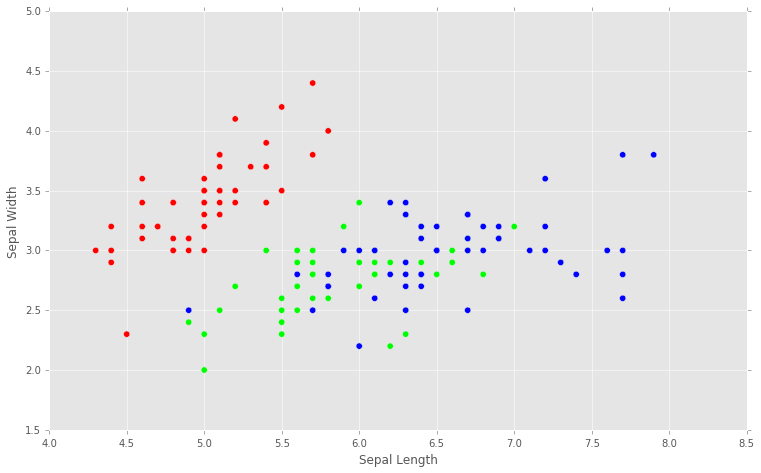

In [6]:
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

fig, ax = plt.subplots()
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
fig.set_size_inches(12.5, 7.5)
fig

The x-axis is sepal length, the y-axis is sepal width, each dot represents the measurements of a specific flower - it represents a specific data point. The color of the dot represents its species. The species represented in red seems like it will be easy to identify; its measuresments are distinct enough when we look at the graph. However, between the green and blue species, there's some overlap. Classifying a flower that has a sepal length between 5.5 and 7.0 cm and a sepal width between 2.0 and 3.5 cm will be tough. 

# The K-Nearest Neighbors Method

Pick one of the dots on the plot above, and pretend you don't know what species it belongs to - you don't know what color it is on the plot. Now imagine your task is to figure what species/color it *should* be. You have three options: red, green, and blue. This is a multiclass classification task. 

One of the easiest and most intuitive ways to approach this task is simply to ask: what is the color of the known data point that's closest to it? If the closest point to our unknown data point is blue, then assign blue to the unknown one. If it's read, assign red, and so on. This is called the 1-Nearest Neighbor method.

Let's say the nearest point to the unknown point is red, so we assign it a label of "red." But what if the second nearest neighbor is blue? And the third-nearest? And fourth and fifth nearest? True, the nearest one is red, but the next 4 nearest are blue. Maybe we should consider the fact that *most* neighbors are blue, and therefore assign blue. This is the 5-Nearest Neighbors method: we're looking at the 5 nearest neighbors and picking the majority label.

Let's try using k-NN with scikit learn.

## Initializing an Empty Classifier

As with the regressor examples, the method we have imported from scikit learn, ``KNearestNeighborsClassifier()``, is a *factory* for creating classifiers, not a classifier itself. So first, we have to use it to initialize an empty, untrained k-NN classifier. 

In [7]:
clf = KNeighborsClassifier(n_neighbors=1)

Note that unlike with Linear Regression, the factor method here *takes an argument*. As you can see, the argument it takes is called ``n_neighbors`` and here I've given it a value of 1. 

Learning methods - including most of the ones in scikit learn - often have "settings" that need to be designated before they can be trained. We call these settings *model parameters*. Linear Regression is the exception, not the rule. It's rare for a model to not have parameters. In this case, the parameter is very intuitive: *how many neighbors should we consider when deciding the class of a point?* Before we even train a classifier, we have to set this parameter.

Now let's train the classifier. Like with Regression, we use the ``fit`` method and pass it the features and the labels.

In [8]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

The classifier is now trained. Using the classifier's ``predict`` method, we can pass it two features - sepal length and sepal width - and it will predict a label. Specifically, it will look at what the nearest neighbor to that point is and assign it that neighbor's label. 

Let's visualize the *decision boundary* for this classifier on the original plot. Decision boundaries indicate where a classifier will classify new data points differently. If you're on A's side of the boundary, you'll be classified as A. If you're on B, you'll be classified as B. 

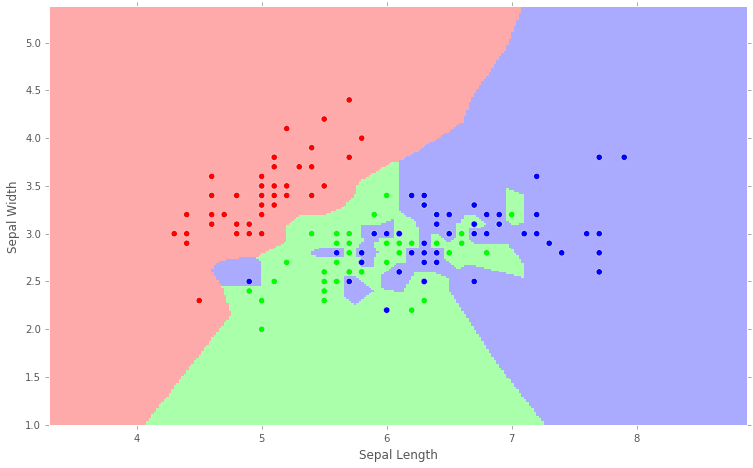

In [9]:
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

Hopefully this image makes clear what a decision boundary is. Imagine you find a new flower and measure it's sepal length and width. Plot it on this chart, and see what the background color of that spot is. Assign it to that color's species. 

Note: some of you might notice that there are blue dots on green territory. For example, at the coordinates ``(6, 2.2)`` there's a blue dot inside green territory that has no blue blob around it. This might strike you as not making sense, since if we're deciding by looking at the closest neighbor, then there should be a blue blob surrounding it. Just to clarify, the 4 instances where you see a blue dot in green territory, there's also a green dot with the *exact same measurements* under it. It's just not being displayed since it's under the blue dot. In instances where there's a tie, scikit learn just chooses the first category in the listing of labels. Since the greens are represented by the number 1 and the blues are represented by the number 2, scikit learn assigns ties between blue and green to green territory.

# Adjusting the k of k-NN

Let's see how this boundary changes when we adjust the 1 parameter in the k-NN method: the number of neighbors. We'll train a new classifier, but when we initialize it we'll ``n_neighbors`` to 15 instead of 1. 

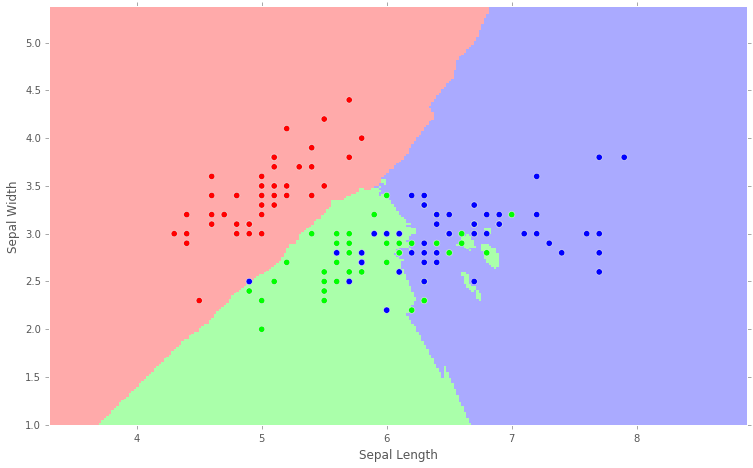

In [10]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

Notice as you raise k, the boundaries get smoother, but there are more "exceptions". To drive the point home, let's try it with a very large value for k. We'll try k = 50. 

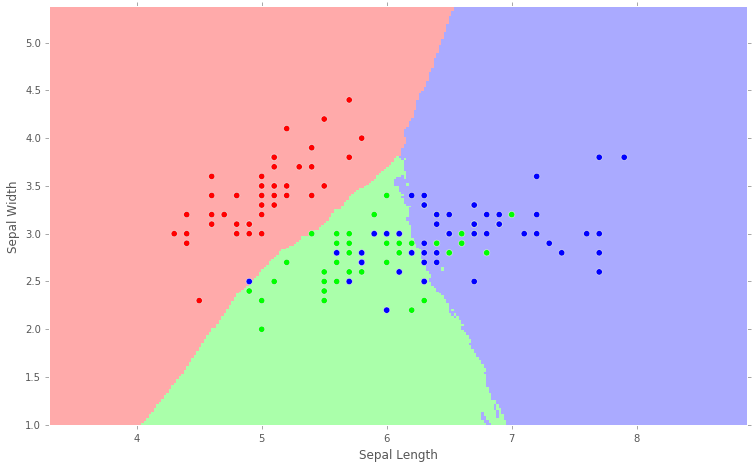

In [11]:
clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X, y)
fig.clf()
ax = fig.add_subplot(111)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
fig

Now the decision boundaries are almost straight lines. We have a "cleaner" model, but the propensity for "exceptional" flowers that get misclassed is higher. 

How do we pick a good value of k? We've only been eyeballing things so far. Generally speaking, there is usually some sort of ideal value of k that incorporates a good amount of information from a point's neighborhood but also isn't so high that the detail in the decision boundaries is lost. Finding a good value for k belongs to the realm of validation and evaluation. We'll cover that next. 